<a href="https://colab.research.google.com/github/codeByGaurish/ml-usecase/blob/main/ml_usecase_mentalhealthdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split
# import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
from xgboost import XGBClassifier

# import 'GridSearchCV'
from sklearn.model_selection import GridSearchCV

# import 'accuracy_score' r2_score
from sklearn.metrics import accuracy_score,r2_score, classification_report, confusion_matrix

# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pd.__version__

'2.1.4'

### Data Exploration : Understand the dataset structure, including number of rows, columns, and data types.

In [ ]:
df = pd.read_csv('/content/data/health.csv')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,MentalHealth
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  MentalHealth    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.shape

(918, 12)

oberservation : rows 918 column 12

In [ ]:
df.tail

<bound method NDFrame.tail of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  MentalHealth  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]>

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,MentalHealth
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Data Exploration: Check for missing values and handle them appropriately (imputation, deletion).

#### checking the sum of missiong values per column

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


oberservation : there are no null values

### Data Exploration: Analyze the distribution of target variable.

#### target variable is MentalHealth


### single feature analysis


<Axes: xlabel='MentalHealth'>

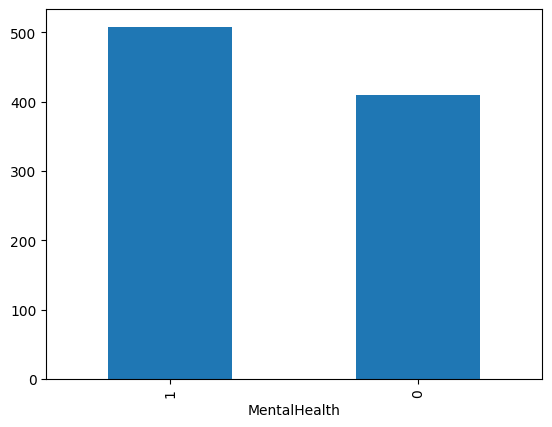

In [ ]:
df["MentalHealth"].value_counts().plot.bar()

### Data Exploration: Explore relationships between features and target variable using visualization techniques (histograms, box plots, correlation matrix).

Text(0.5, 0, 'Age')

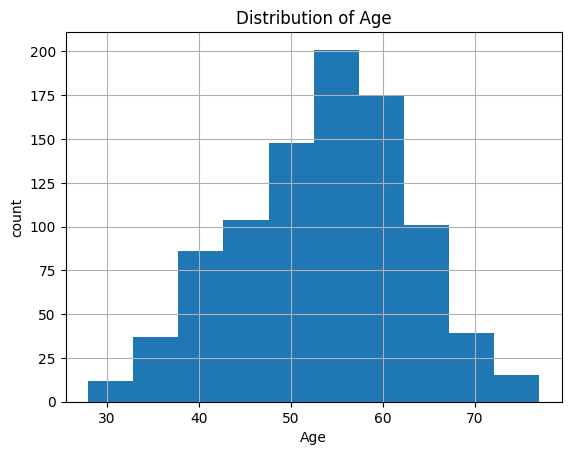

In [ ]:
df['Age'].hist()
plt.title('Distribution of Age')
plt.ylabel('count')
plt.xlabel('Age')

Observation : age counts are more between 40 to 65

Text(0.5, 0, 'Sex')

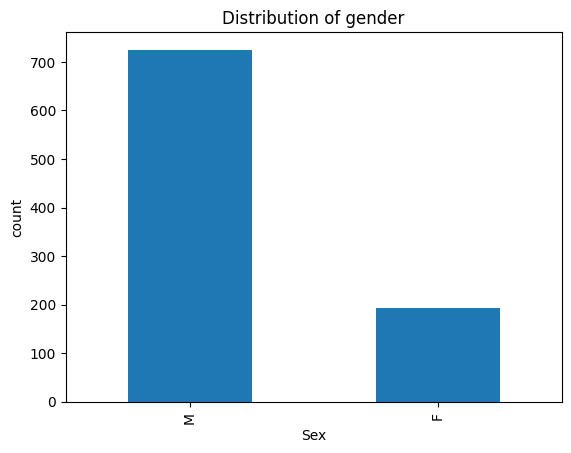

In [ ]:
df["Sex"].value_counts().plot.bar()
plt.title('Distribution of gender')
plt.ylabel('count')
plt.xlabel('Sex')


obervation : mental health issues are more in male


Text(0.5, 0, 'type of chest pain')

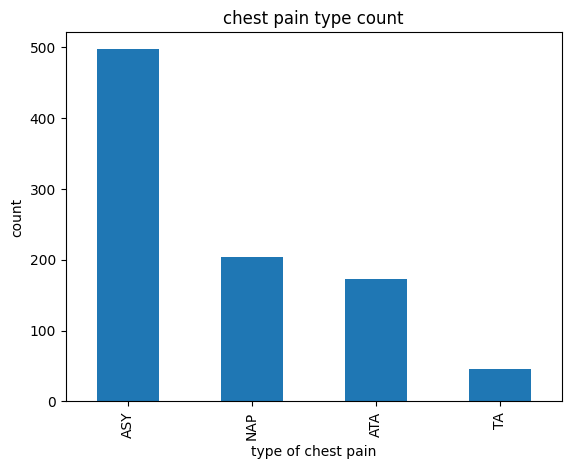

In [ ]:
df["ChestPainType"].value_counts().plot.bar()
plt.title('chest pain type count')
plt.ylabel('count')
plt.xlabel('type of chest pain')

obeserbation: max patient haas ASY type of chest pain

Text(0.5, 0, 'RestingBP')

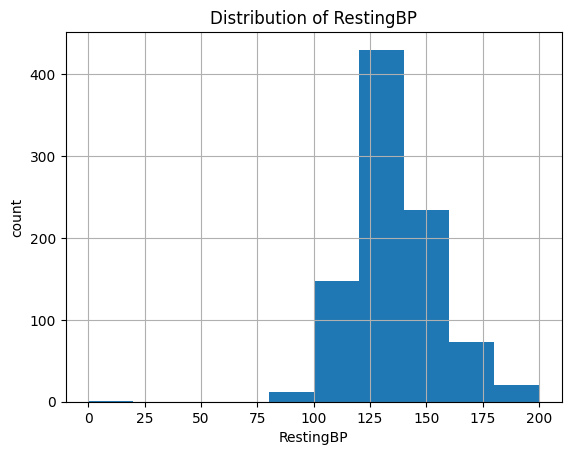

In [ ]:
df['RestingBP'].hist()
plt.title('Distribution of RestingBP')
plt.ylabel('count')
plt.xlabel('RestingBP')

oberservation : most of the patients Resting blood pressure is between 120-150

Text(0.5, 0, 'Cholesterol')

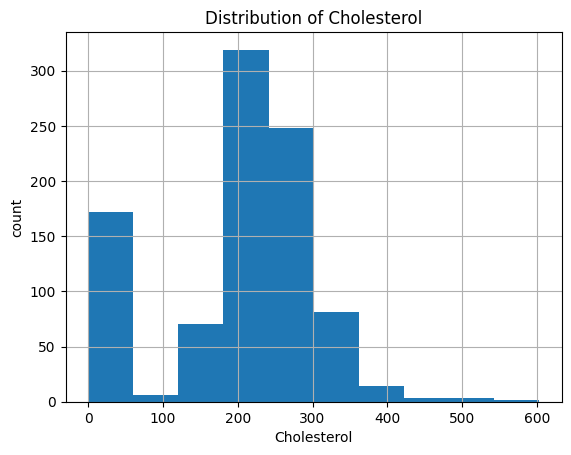

In [ ]:
df['Cholesterol'].hist()
plt.title('Distribution of Cholesterol')
plt.ylabel('count')
plt.xlabel('Cholesterol')

oberservation : most of the patients colestrol are between 190 to 300

Text(0.5, 0, 'Fasting BS')

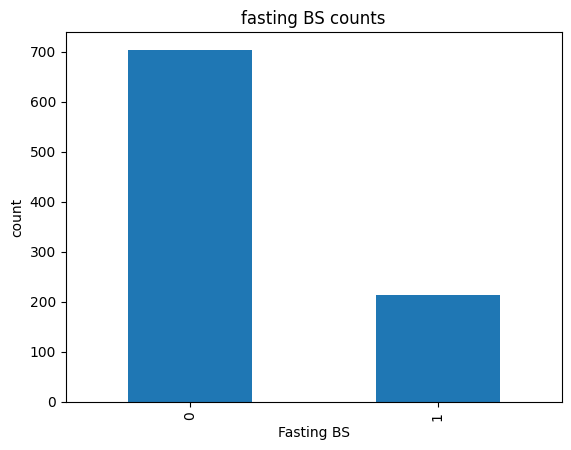

In [ ]:
df["FastingBS"].value_counts().plot.bar()
plt.title('fasting BS counts')
plt.ylabel('count')
plt.xlabel('Fasting BS')

oberservation : most of the patients are not having fastign Blood sugar

Text(0.5, 0, 'Resting ECG')

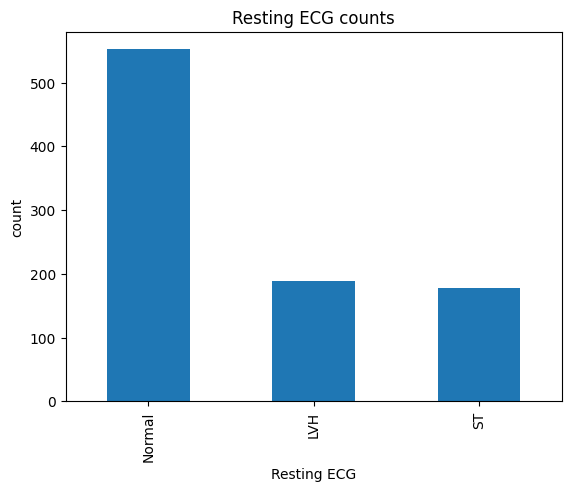

In [ ]:
df["RestingECG"].value_counts().plot.bar()
plt.title('Resting ECG counts')
plt.ylabel('count')
plt.xlabel('Resting ECG')

oberservation :most of the patients have normal ECG resting count

Text(0.5, 0, 'MaxHR')

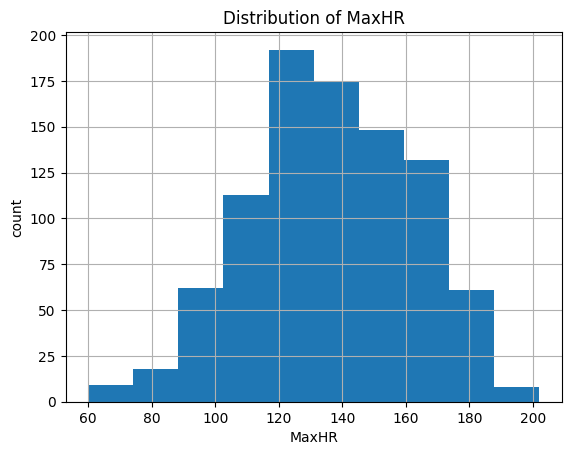

In [ ]:
df['MaxHR'].hist()
plt.title('Distribution of MaxHR')
plt.ylabel('count')
plt.xlabel('MaxHR')

oberservation :most patients have max HR between 115 to 145

Text(0.5, 0, 'Excise  angina(chest pain)')

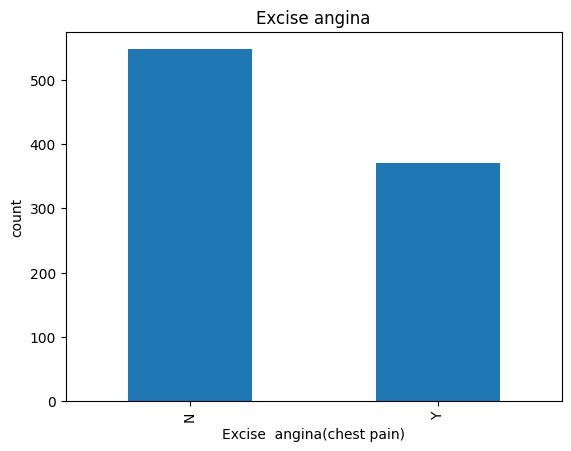

In [ ]:
df["ExerciseAngina"].value_counts().plot.bar()
plt.title('Exercise angina')
plt.ylabel('count')
plt.xlabel('Exercise  angina(chest pain)')

oberservation :most of the patients are not having any chest pain during the exercise

Text(0.5, 0, 'Oldpeak')

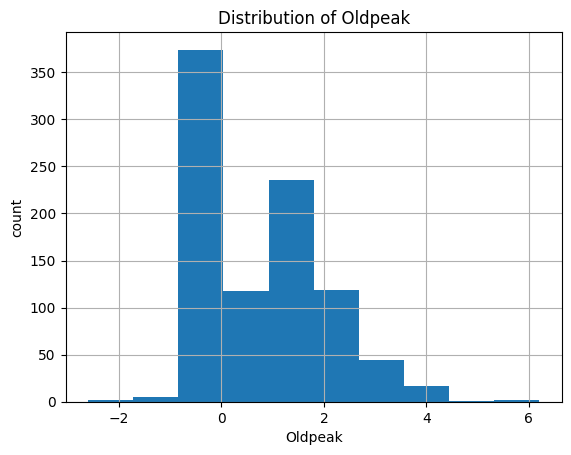

In [ ]:
df['Oldpeak'].hist()
plt.title('Distribution of Oldpeak')
plt.ylabel('count')
plt.xlabel('Oldpeak')

oberservation : most patients have old peak of -1 to 0

Text(0.5, 0, 'ST_slope')

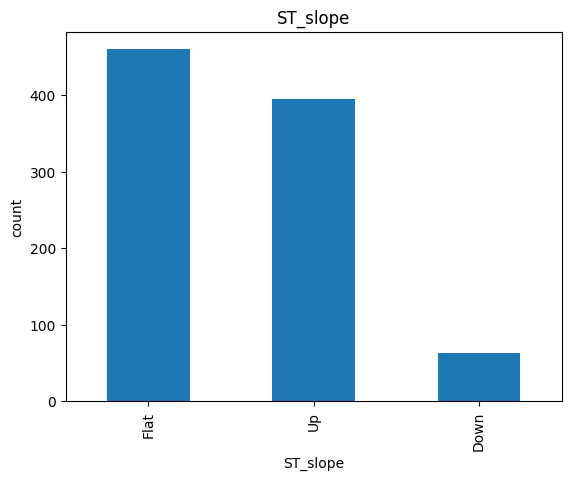

In [ ]:
df["ST_Slope"].value_counts().plot.bar()
plt.title('ST_slope')
plt.ylabel('count')
plt.xlabel('ST_slope')

oberservation : most patients have st plope as flat

<Axes: >

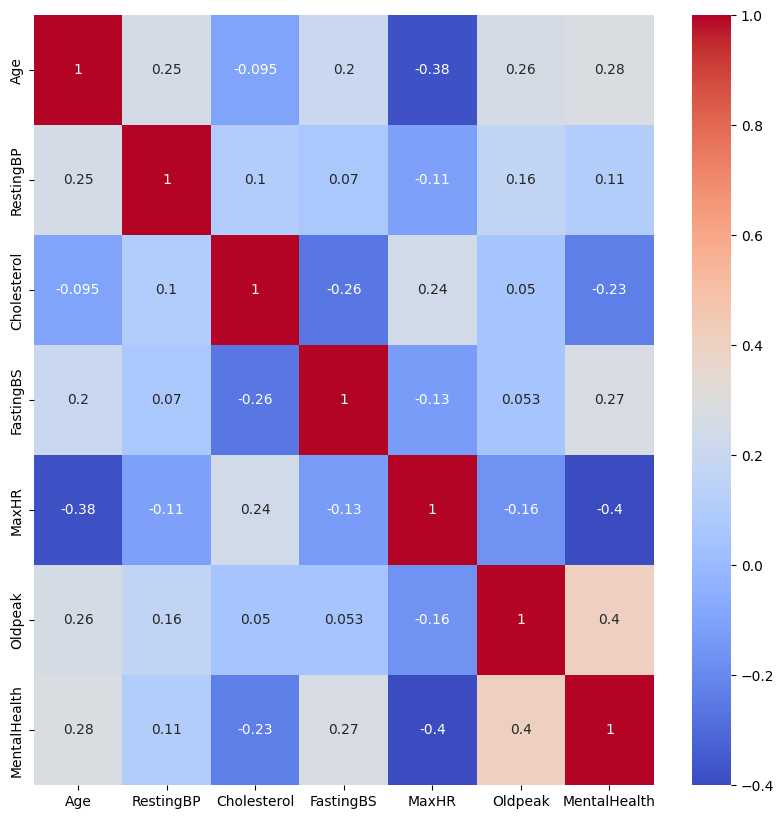

In [ ]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

###  oberservation : no strong co relation


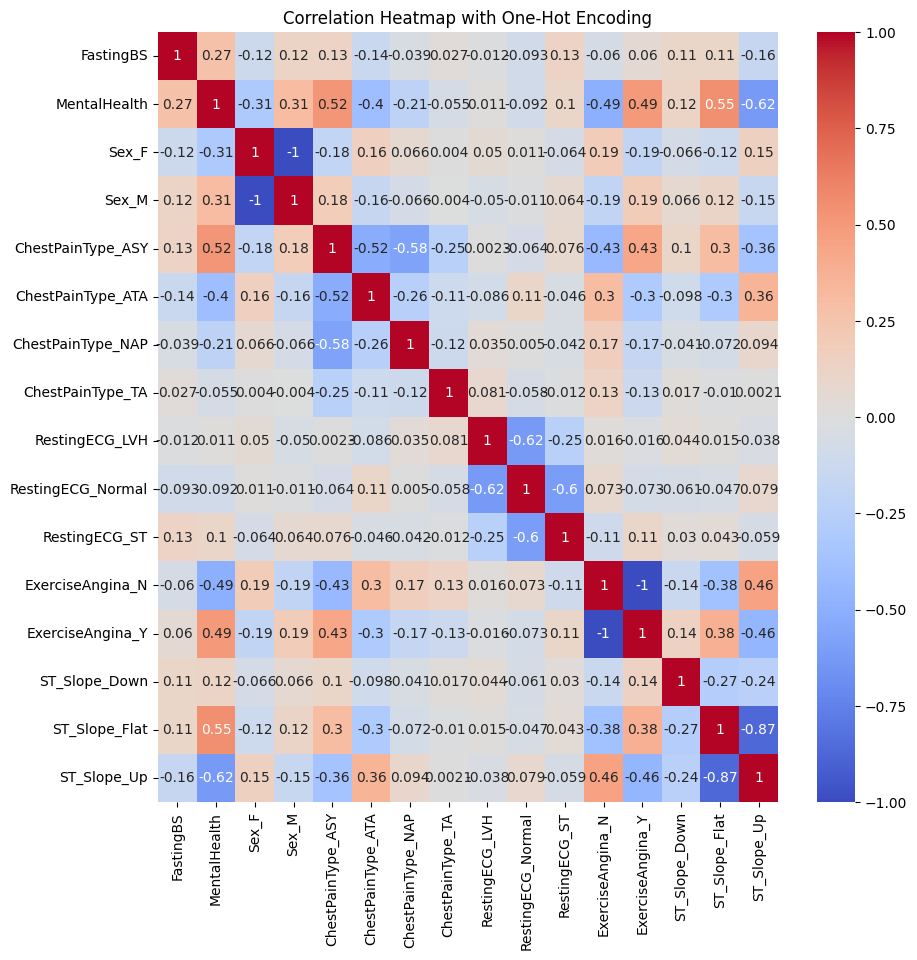

In [ ]:
# Convert categorical columns to dummy/one-hot encoded columns

df_categorical = df[['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope','MentalHealth']]
df_encoded = pd.get_dummies(df_categorical)

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add labels and title
plt.title('Correlation Heatmap with One-Hot Encoding')
plt.show()

oberservation : No strong co relation can be oberserved

## Checking the feature relationship with target variable in order to understand data better

<Axes: xlabel='MentalHealth', ylabel='count'>

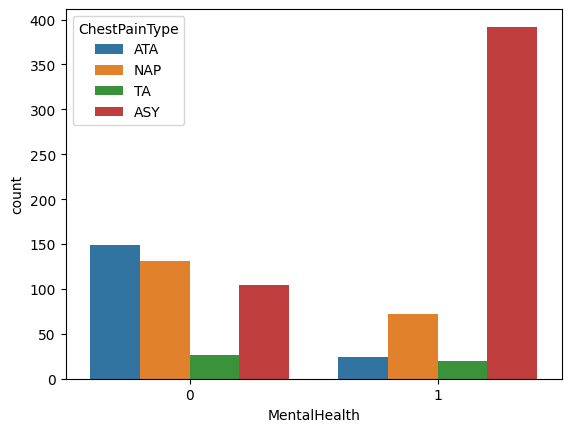

In [ ]:
sns.countplot(x='MentalHealth',hue='ChestPainType',data=df)

oberservation : patient with chestpain type ASY has higher number of mental health issue

<Axes: xlabel='Age_range', ylabel='MentalHealth'>

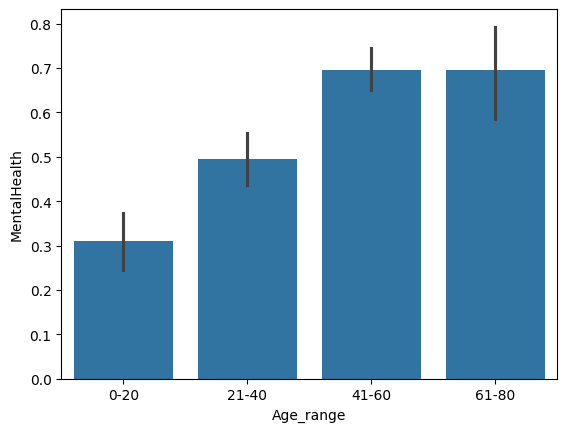

In [ ]:
df['Age_range'] = pd.qcut(df['Age'],q=[0,0.20,0.50,0.90,1],labels=['0-20','21-40','41-60','61-80'])
sns.barplot(x=df['Age_range'],y=df['MentalHealth'])

oberservation : After age of 40 more patients are having chances of Mental health

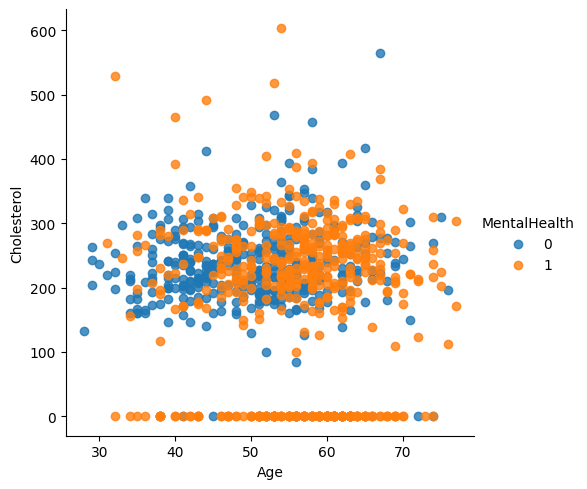

In [ ]:
sns.lmplot(x='Age', y='Cholesterol', hue='MentalHealth',data=df, fit_reg=False)

oberservation : age>50 and colesterol >200 has more chances of mental health issue

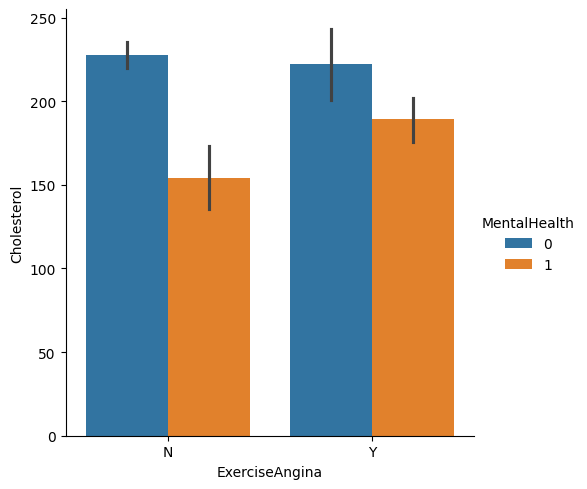

In [ ]:
sns.catplot(y='Cholesterol',x='ExerciseAngina',hue='MentalHealth',data=df,kind='bar')

oberservation : patients who has chest pain and high cholesterol has high chances of mental health issues

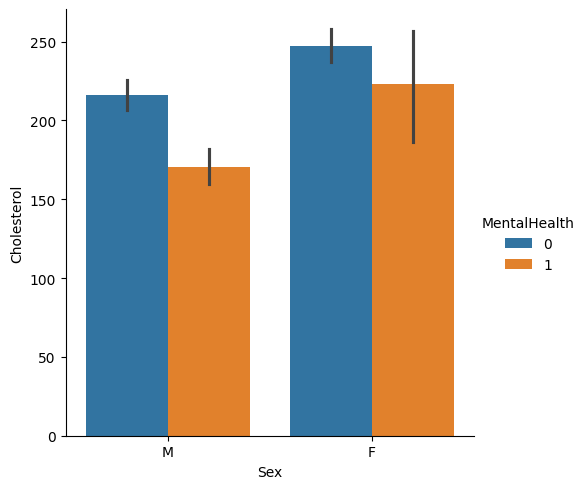

In [ ]:
sns.catplot(y='Cholesterol',x='Sex',hue='MentalHealth',data=df,kind='bar')

oberservation : Female who has more cholesterol are having mental health issue

Data Exploration :Identify outliers and handling them accordingly.[link text]

In [ ]:
df[['RestingBP','Cholesterol','MaxHR','Oldpeak']].describe()

,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000
mean,132.396514,198.799564,136.809368,0.887364
std,18.514154,109.384145,25.460334,1.066570
min,0.000000,0.000000,60.000000,-2.600000
25%,120.000000,173.250000,120.000000,0.000000
50%,130.000000,223.000000,138.000000,0.600000
75%,140.000000,267.000000,156.000000,1.500000
max,200.000000,603.000000,202.000000,6.200000


 **Outlier Detection**

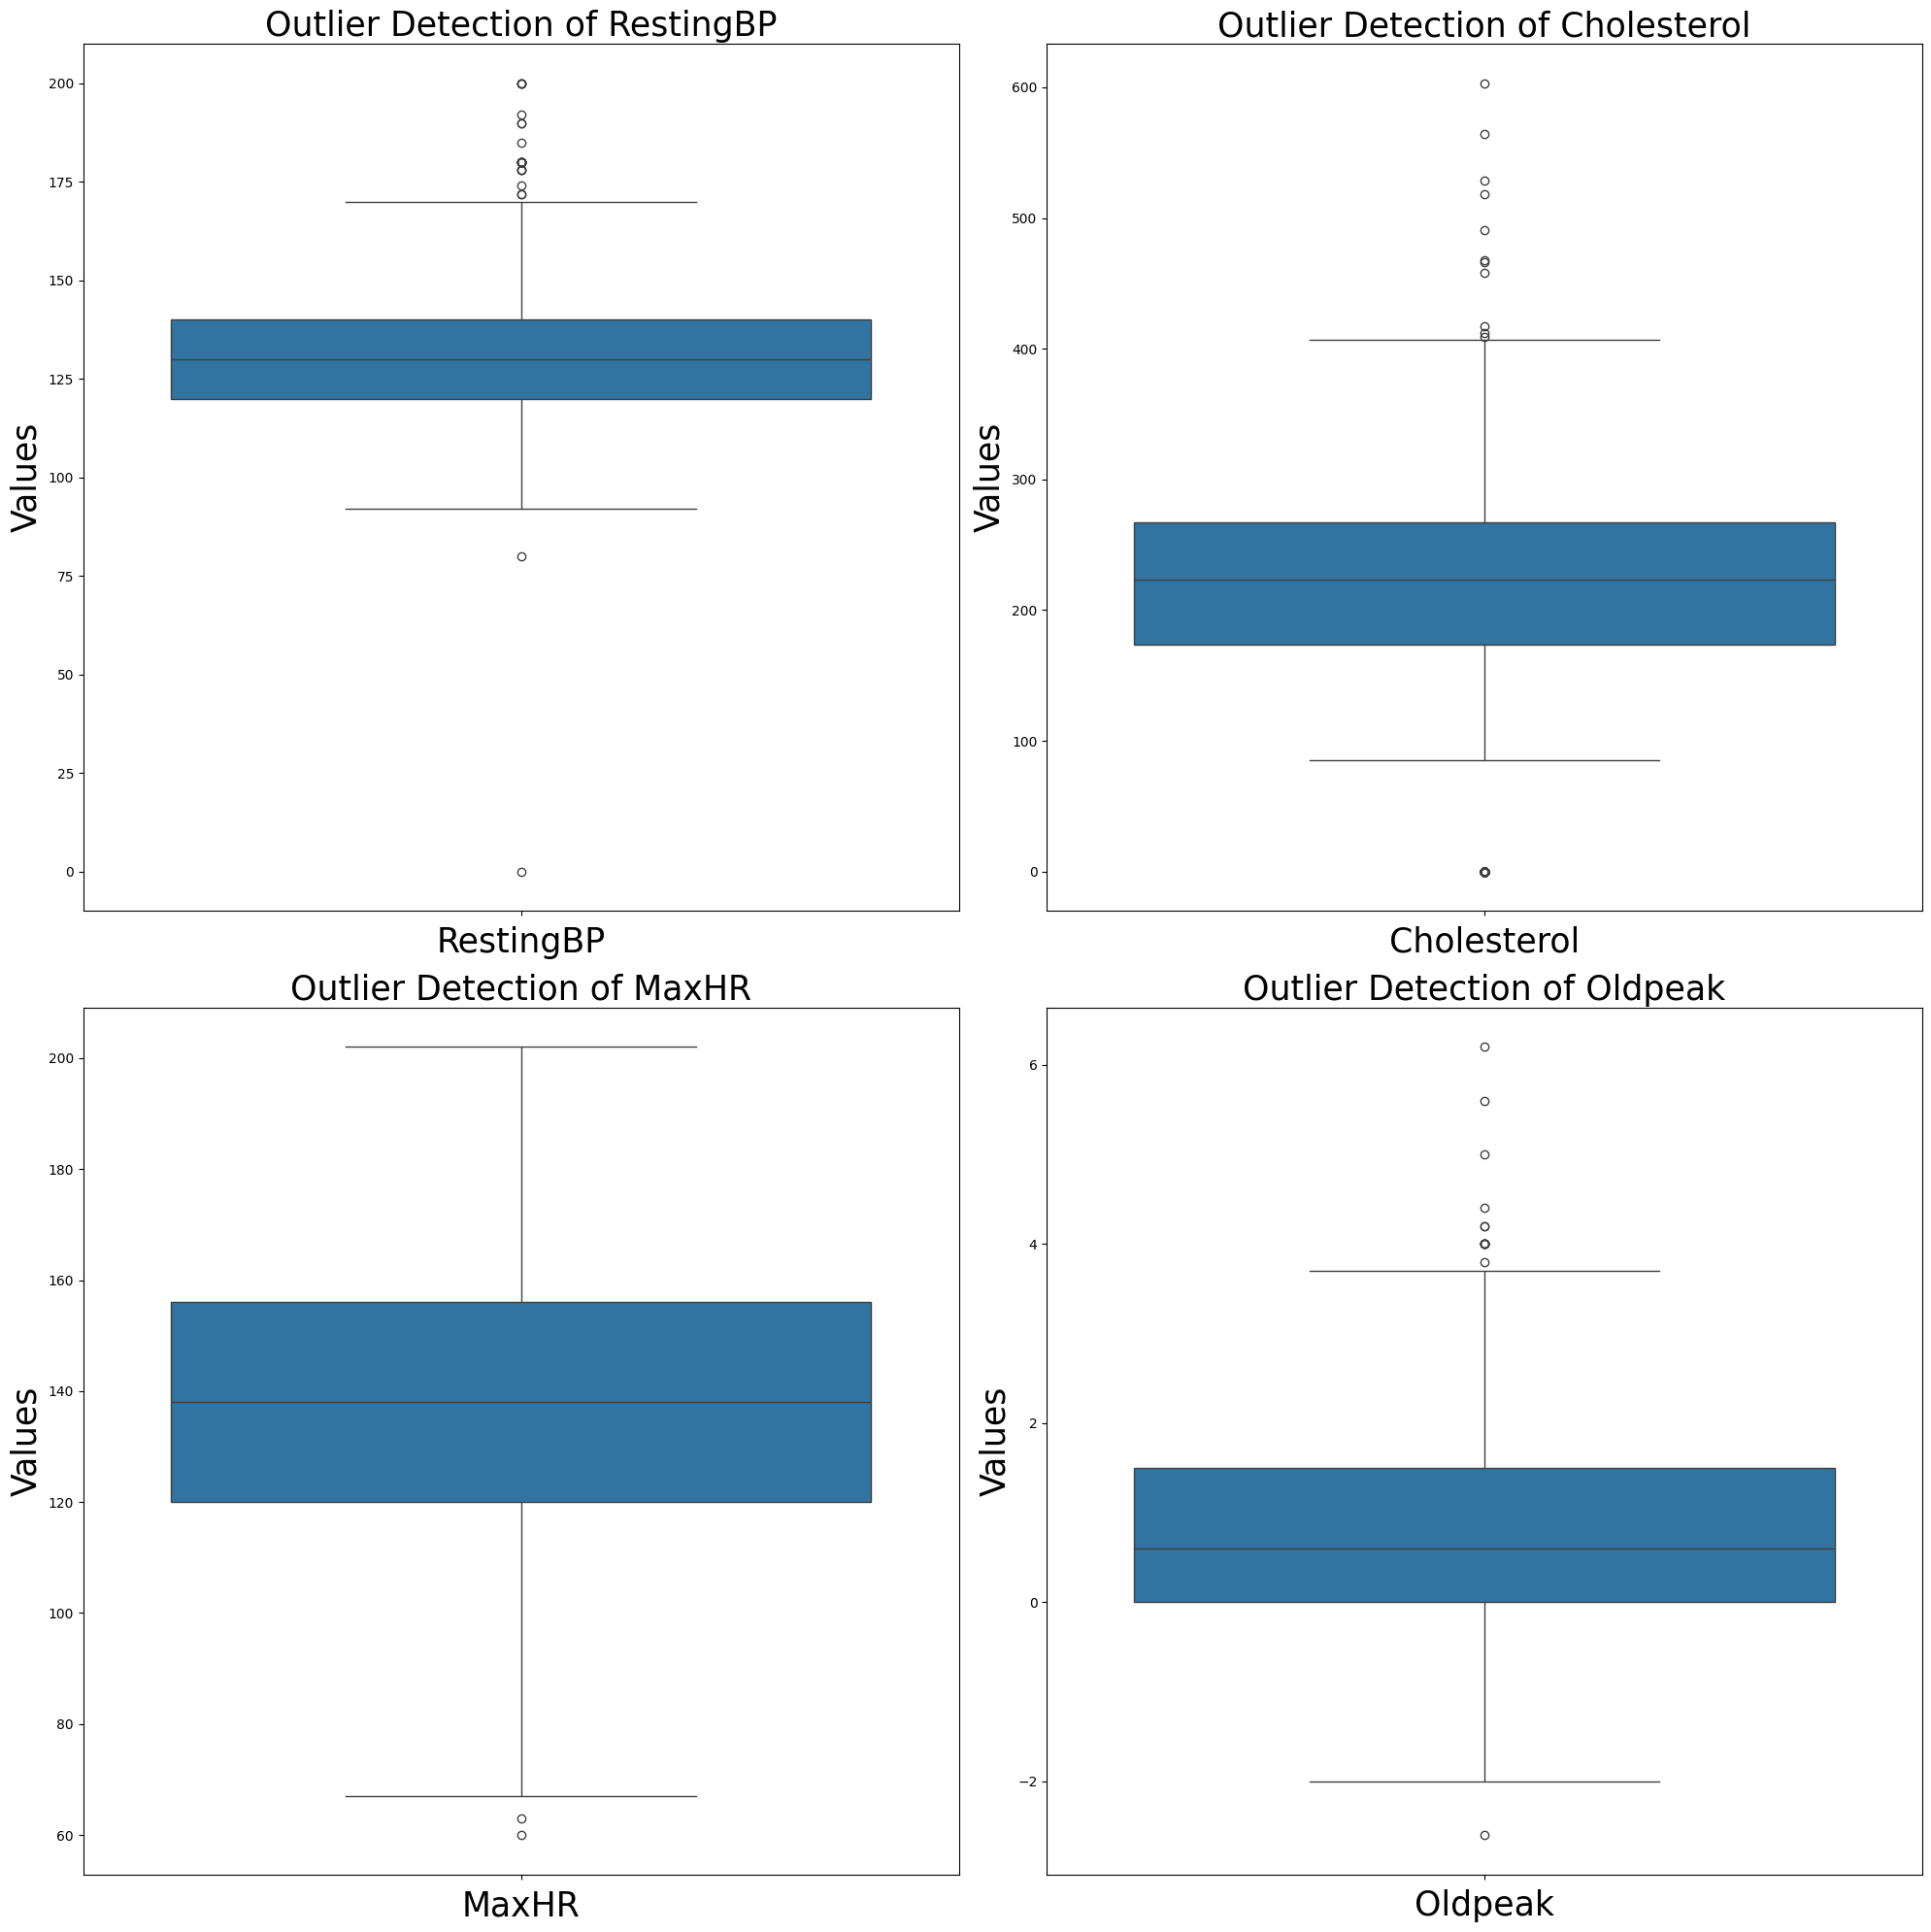

In [ ]:
col = ['RestingBP','Cholesterol','MaxHR','Oldpeak']

plt.figure(figsize=(20,20))
for i in range(0,4):
    col_temp = col[i]
    # Use of subplots
    plt.subplot(2,2,i+1)
    plt.title('Outlier Detection of '+col_temp,fontsize=25)


    sns.boxplot(y=df[col_temp])
    plt.xlabel(col_temp,fontsize=25)
    plt.ylabel('Values',fontsize=25)
    plt.tight_layout()


In [ ]:
def count_outlier(feature):
    std = df[feature].std()
    mean = df[feature].mean()
    outlier_range1 = mean + (std*3)
    outlier_range2 = mean - (std*3)
    return len(df[(df[feature] > outlier_range1) + (df[feature] < outlier_range2)])


def confusion_matrix_plot(cm):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))

    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()

In [ ]:
count_outlier('RestingBP')

8

In [ ]:
count_outlier('Cholesterol')

3

In [ ]:
count_outlier('MaxHR')

1

In [ ]:
count_outlier('Oldpeak')

7

** DATA SUMMARY **


*   there are no null values
* age counts are more between 40 to 65
* mental health issues are more in male
* max patient haas ASY type of chest pain
* most of the patients Resting blood pressure is between 120-150
* most of the patients colestrol are between 190 to 300
* most of the patients are not having fastign Blood sugar
* most of the patients have normal ECG resting count
* most patients have max HR between 115 to 145
* most of the patients are not having any chest pain during the exercise
* most patients have old peak of -1 to 0
* most patients have st plope as flat
* no strong co relation between numerical or categorical feature
* patient with chestpain type ASY has higher number of mental health issue
* After age of 40 more patients are having chances of Mental health
* age>50 and colesterol >200 has more chances of mental health issue
* patients who has chest pain and high cholesterol has high chances of mental health issue
*  Female who has more cholesterol are having mental health issue
* RestingBP has Outlier in less then 85 and greater then 175
* Cholesterol has Outlier in less then 10 and greater then 400
* MaxHR has Outlier in less then 70
* Oldpeak has Outlier in less then -2 and greater then 3.5
* We can say that Age is in normal distribution




# Feature Engineering

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'MentalHealth'],
      dtype='object')

## dividing into independent and dependent

In [ ]:
#independent varible
x = df.iloc[:,:-1]
#dependent varible
y = df.iloc[:,-1]
#y = df['MentalHealth']


NameError: name 'df' is not defined

## Train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [ ]:
x_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
585,57,M,ATA,180,285,1,ST,120,N,0.8,Flat
169,58,M,NAP,140,179,0,Normal,160,N,0.0,Up
602,61,M,NAP,120,337,0,Normal,98,Y,0.0,Flat
140,52,M,ASY,160,331,0,Normal,94,Y,2.5,Flat
173,49,M,NAP,140,187,0,Normal,172,N,0.0,Up


## Encoding

In [ ]:
encoder = ce.OrdinalEncoder(cols=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])


In [ ]:
# Encoding train and test
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)



In [ ]:
x_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
585,57,1,1,180,285,1,1,120,1,0.8,1
169,58,1,2,140,179,0,2,160,1,0.0,2
602,61,1,2,120,337,0,2,98,2,0.0,1
140,52,1,3,160,331,0,2,94,2,2.5,1
173,49,1,2,140,187,0,2,172,1,0.0,2


# **MODEL BUILDING**

## **Logistic Regression default parameters**

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
print('accuracy score ',accuracy_score(y_test, y_pred))

accuracy score  0.8481848184818482


Text(0.5, 1.0, 'Diffrence in actual and test result')

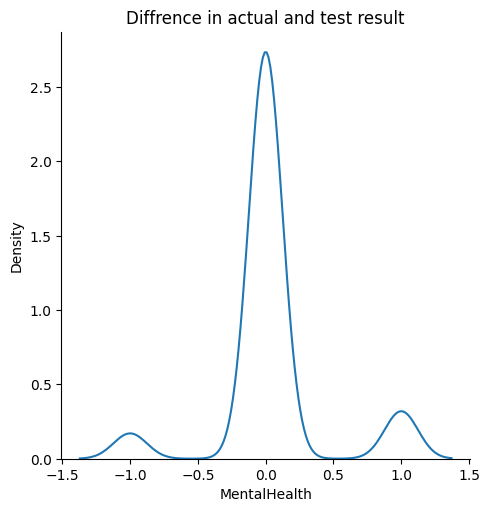

In [ ]:
sns.displot(y_test-y_pred,kind='kde')
plt.title('Diffrence in actual and test result')

In [ ]:
cm = confusion_matrix(y_test,y_pred)

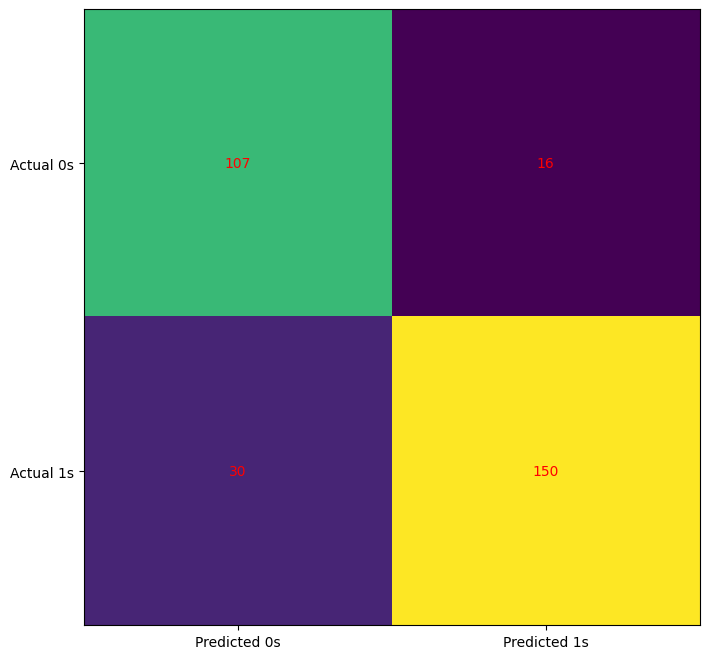

In [ ]:
confusion_matrix_plot(cm)

# **Logistic Regression default solver='liblinear', C=10.0, random_state=0**

In [ ]:
lr = LogisticRegression(solver='liblinear', C=10.0, random_state=0)

In [ ]:
#training model
lr.fit(x_train,y_train)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
print('accuracy score ',accuracy_score(y_test, y_pred))

accuracy score  0.8415841584158416


In [ ]:
cm = confusion_matrix(y_test,y_pred)

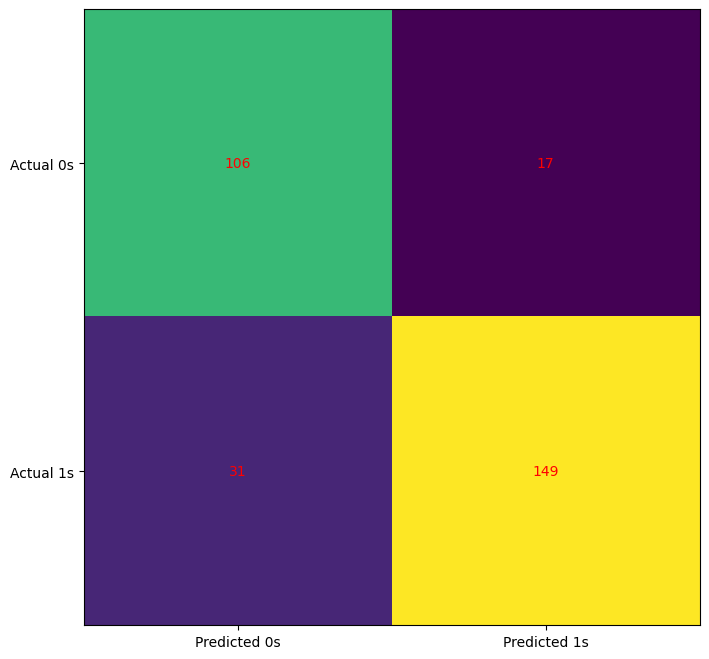

In [ ]:
confusion_matrix_plot(cm)

# **Logistic Regression hyperparameter tuning**

In [ ]:
# createing model
classifier = LogisticRegression()

In [ ]:
#training model
parameters = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40],
             'max_iter':[100,200,300]}

In [ ]:
# hyperparameter tuning
classifier = GridSearchCV(classifier,param_grid=parameters,scoring='accuracy',cv=5)

In [ ]:
# testing model

classifier.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
print(classifier.best_params_)

{'C': 5, 'max_iter': 100, 'penalty': 'l2'}


In [ ]:
##predication
y_pred = classifier.predict(x_test)

In [ ]:
print('accuracy score ',accuracy_score(y_test, y_pred))

accuracy score  0.8382838283828383


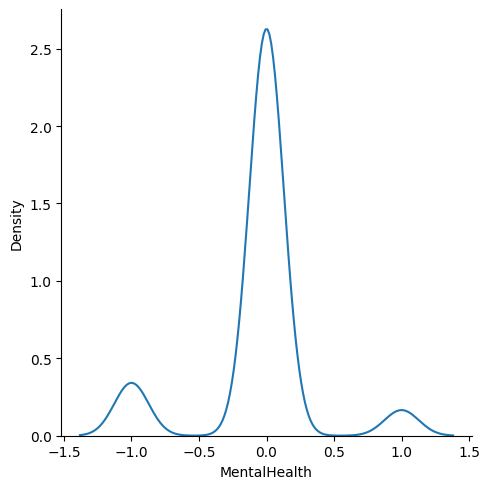

In [ ]:
#plotting displot
sns.displot(y_pred-y_test,kind='kde')

In [ ]:
# plottting confusion matrix

cm = confusion_matrix(y_test,y_pred)

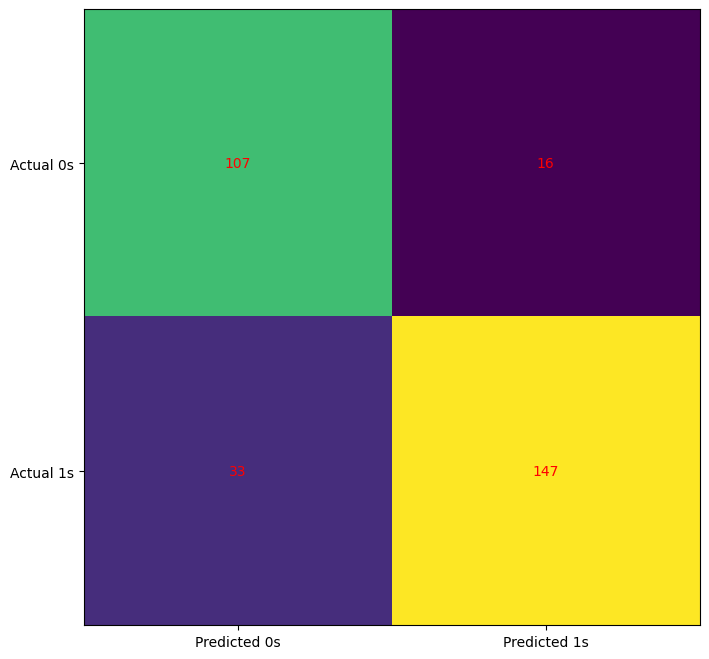

In [ ]:
confusion_matrix_plot(cm)

# **DecisionTree default parameters**

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
#training model
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
##predication
y_pred = dt.predict(x_test)

In [ ]:
print('accuracy score ',accuracy_score(y_test, y_pred))

accuracy score  0.768976897689769


In [ ]:
cm = confusion_matrix(y_test,y_pred)

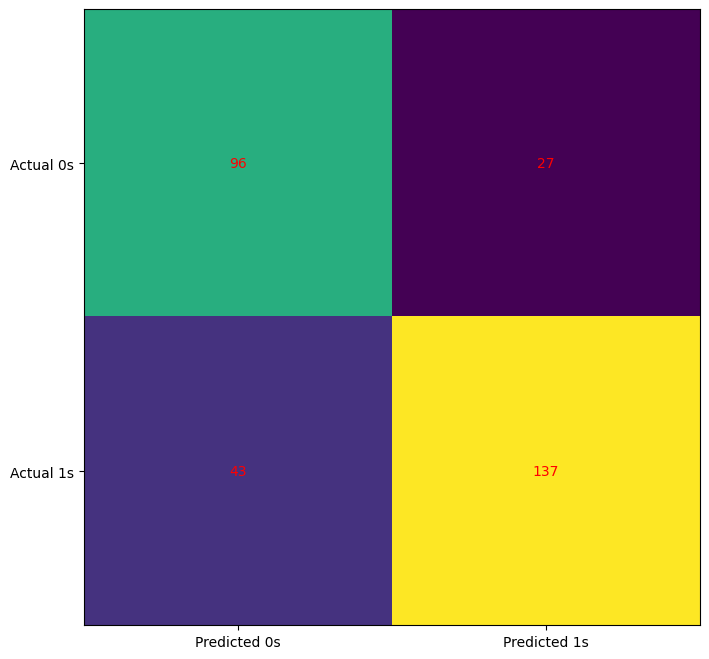

In [ ]:
# plottting confusion matrix

confusion_matrix_plot(cm)

# **DecisionTree with criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5**

In [ ]:
# createing model

clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)

In [ ]:
#training model

dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
##predication
y_pred = dt.predict(x_test)

In [ ]:
print('accuracy score ',accuracy_score(y_test, y_pred))

accuracy score  0.7656765676567657


In [ ]:
cm = confusion_matrix(y_test,y_pred)

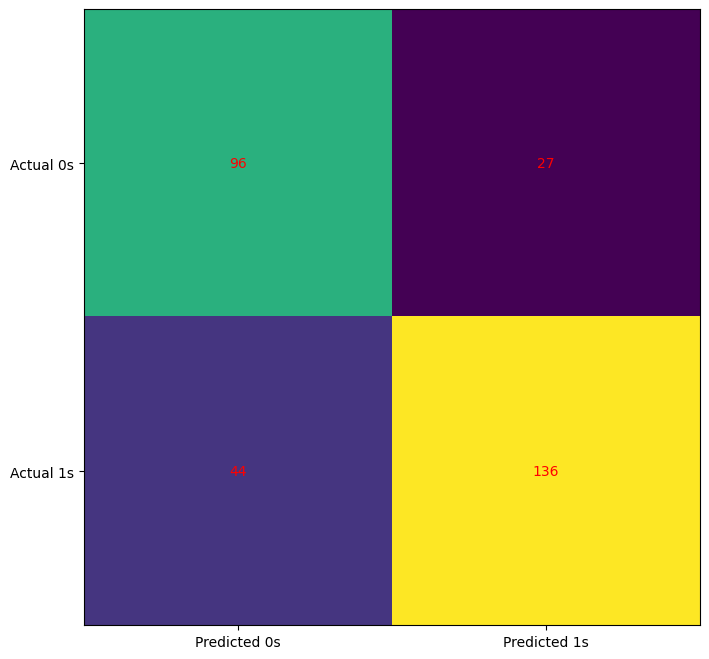

In [ ]:
# plottting confusion matrix

confusion_matrix_plot(cm)

# **Random Forest Classifier model with default parameters**

In [ ]:
rfc = RandomForestClassifier(random_state=0)

In [ ]:
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rfc.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)

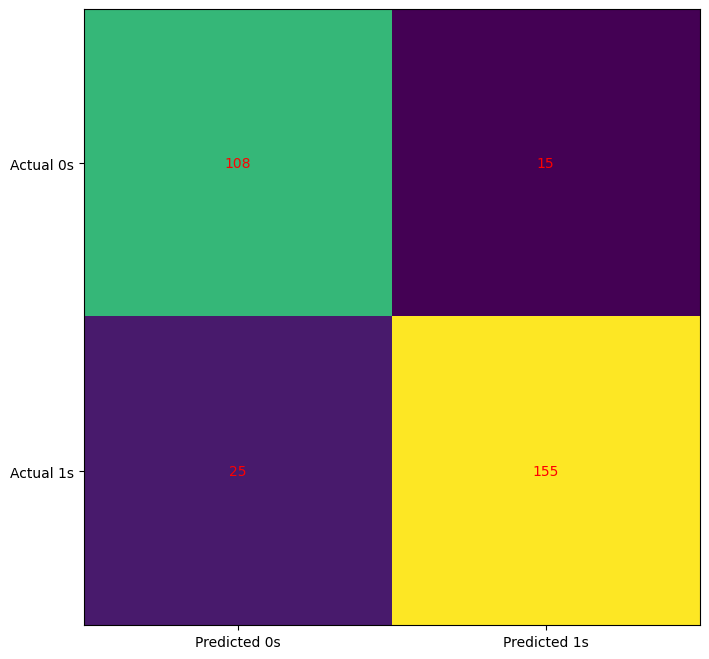

In [ ]:
confusion_matrix_plot(cm)

# **Random Forest Classifier model with parameter n_estimators=100**

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

In [ ]:
# training model

rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# testing model
accuracy_score(y_test, y_pred)

0.8679867986798679

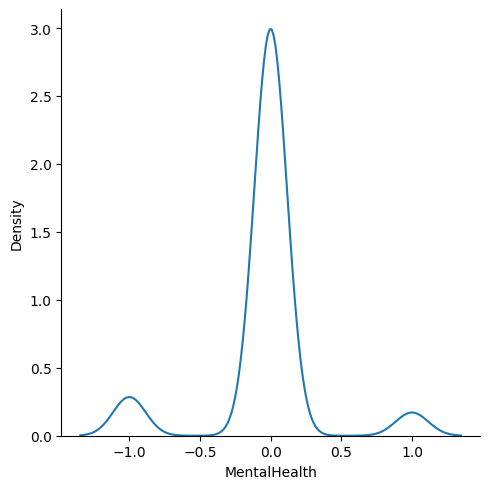

In [ ]:
#plotting displot
sns.displot(y_pred-y_test,kind='kde')

In [ ]:
cm = confusion_matrix(y_test,y_pred)

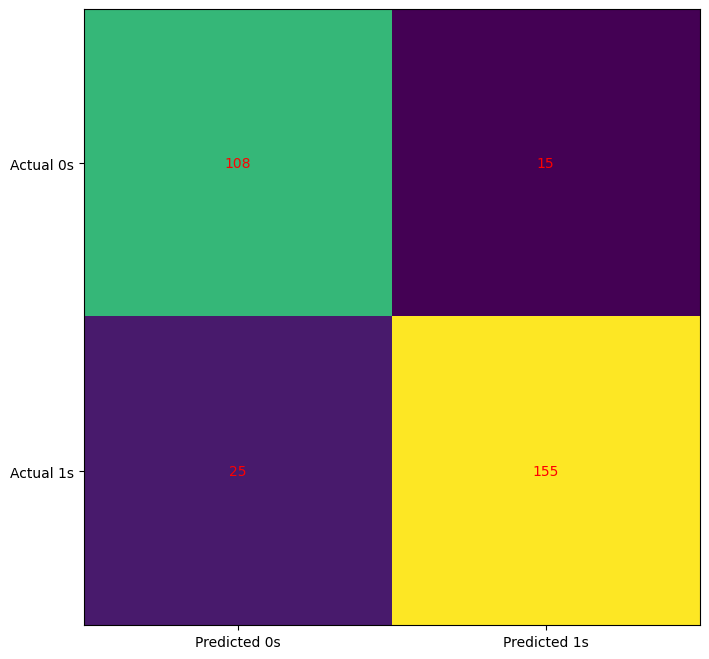

In [ ]:
confusion_matrix_plot(cm)

# **Finding important features with Random Forest model**

<Axes: xlabel='None', ylabel='None'>

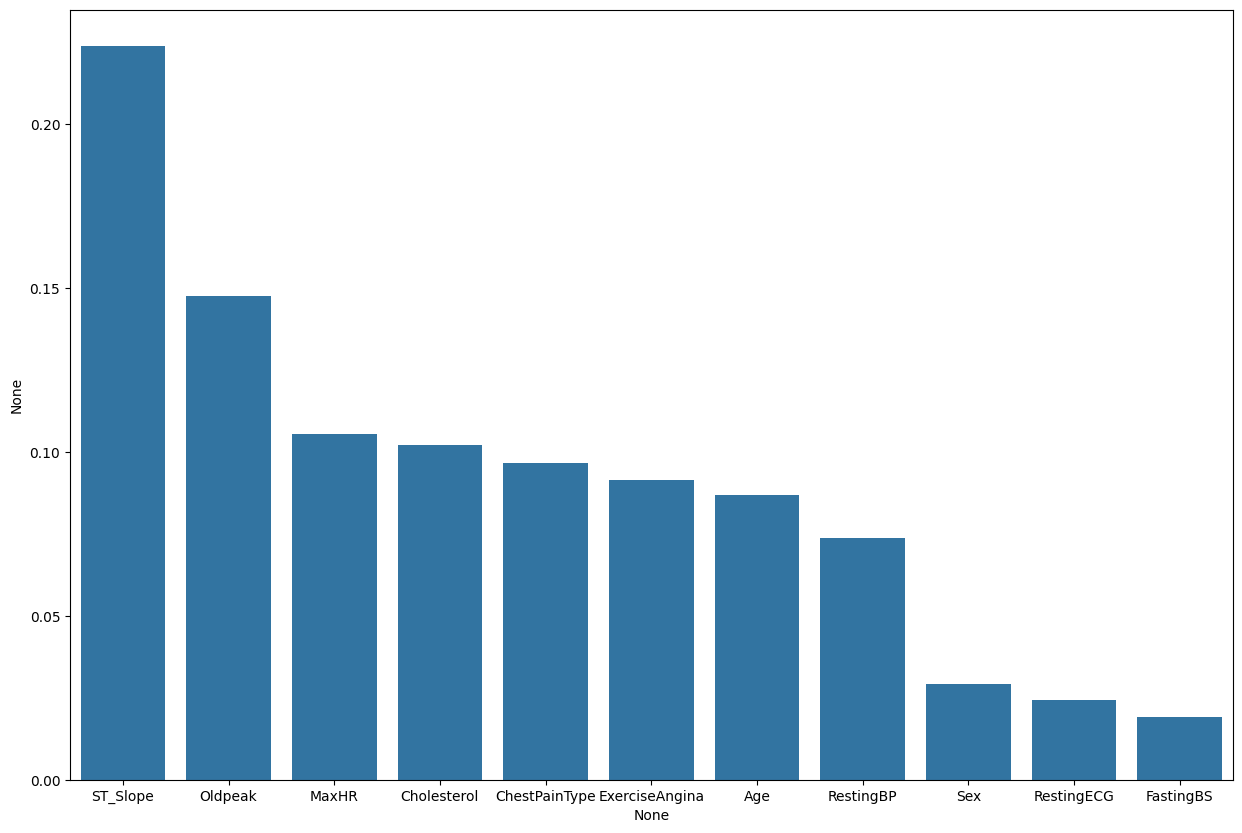

In [ ]:
feature_scores = pd.Series(rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(y=feature_scores,x=feature_scores.index)

In [ ]:
accurracyscore = [0.8415841584158416,0.7557755775577558,0.8679867986798679]
name = ['Logistic Regression','Decision Tree','Random Forest ']

Text(0.5, 1.0, 'Best accurracy score ')

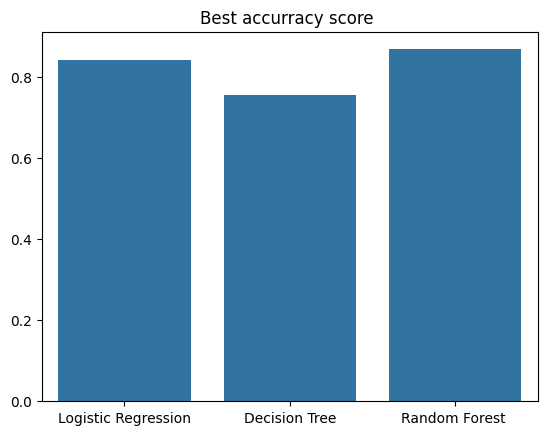

In [ ]:
sns.barplot(x=name,y=accurracyscore)
plt.title("Best accurracy score ")

# **Best score is for RF with the accuracy of 0.86**